## Post pruning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
ds = sns.load_dataset('iris')

In [6]:
ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
ds.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
X = ds[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [9]:
y = ds[['species']]

In [10]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

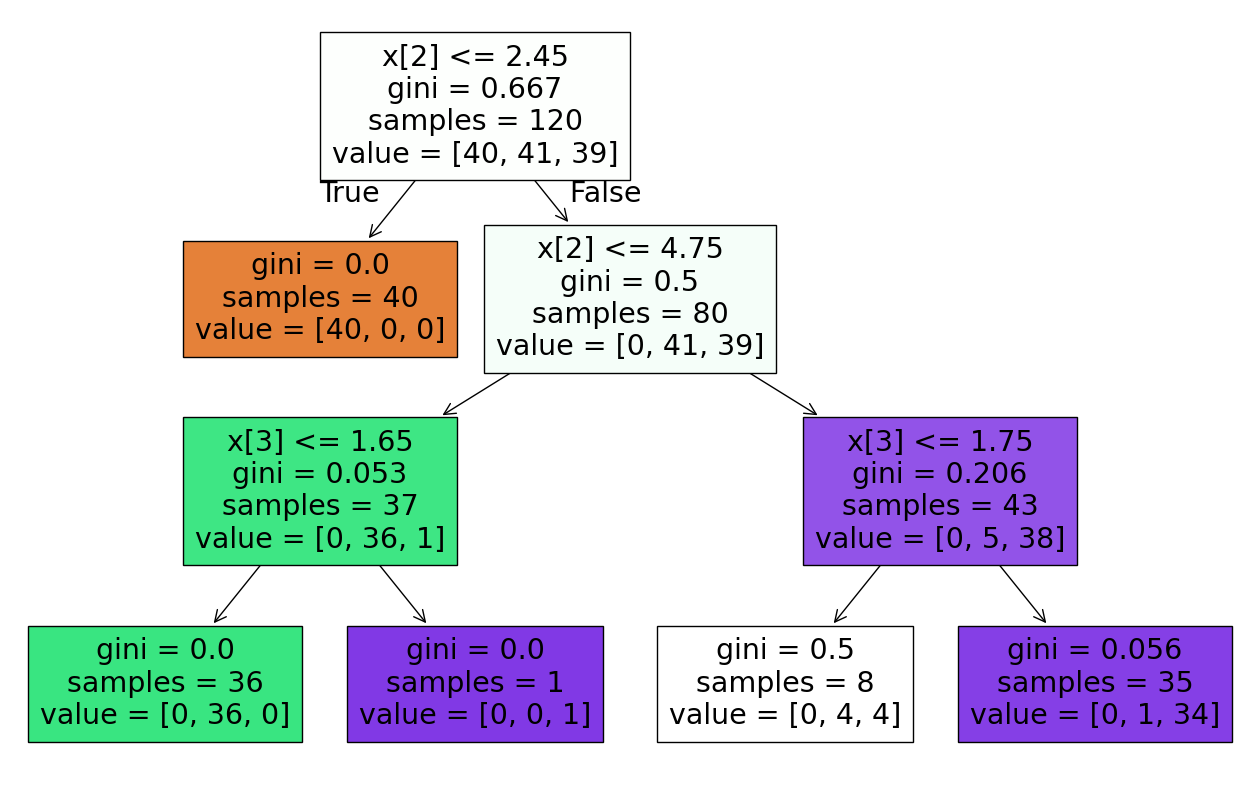

In [28]:
from sklearn import tree

plt.figure(figsize=(16,10))
tree.plot_tree(dtree, filled=True)
plt.show()

In [29]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

In [30]:
confusion_matrix(y_train, y_train_pred)


array([[40,  0,  0],
       [ 0, 40,  1],
       [ 0,  4, 35]])

In [31]:
accuracy_score(y_train, y_train_pred)

0.9583333333333334

In [32]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.91      0.98      0.94        41
   virginica       0.97      0.90      0.93        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [33]:
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [34]:
accuracy_score(y_test, y_test_pred)


1.0

In [35]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Pre Pruning

In [37]:
parameters = {

            'criterion' : ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random'],
            'max_depth' : [1,2,3,4,5],
            'max_features' : ['auto', 'sqrt', 'log2']
 
            }


In [38]:
parameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [39]:
from sklearn.model_selection import GridSearchCV

In [41]:
dtree = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dtree, param_grid=parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [42]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [43]:
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

In [44]:
confusion_matrix(y_train, y_train_pred)

array([[40,  0,  0],
       [ 0, 40,  1],
       [ 0,  5, 34]])

In [45]:
accuracy_score(y_train, y_train_pred)

0.95

In [47]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.89      0.98      0.93        41
   virginica       0.97      0.87      0.92        39

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[40,  0,  0],
       [ 0, 40,  1],
       [ 0,  5, 34]])

In [49]:
accuracy_score(y_test, y_test_pred)

1.0

In [48]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

